In [1]:
# import the necessary packages
from mrcnn.config import Config
from mrcnn import model as modellib
from mrcnn import visualize
import mrcnn
import numpy as np
import colorsys
import argparse
import imutils
import random
import cv2
import os
from matplotlib import pyplot
from matplotlib.patches import Rectangle
%matplotlib inline

Using TensorFlow backend.


In [2]:
class myMaskRCNNConfig(Config):
 # give the configuration a recognizable name
 NAME = "MaskRCNN_inference"
 
 # set the number of GPUs to use along with the number of images
 # per GPU
 GPU_COUNT = 1
 IMAGES_PER_GPU = 1
 
 # number of classes (we would normally add +1 for the background
 # but the background class is *already* included in the class
 # names)
 NUM_CLASSES = 1+80

In [3]:
config = myMaskRCNNConfig()
print("loading weights for Mask R-CNN model…")
model = modellib.MaskRCNN(mode="inference", config=config, model_dir='./')
model.load_weights('mask_rcnn_coco.h5', by_name=True)

loading weights for Mask R-CNN model…





Instructions for updating:
keep_dims is deprecated, use keepdims instead
Instructions for updating:
keep_dims is deprecated, use keepdims instead

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [4]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
 'bus', 'train', 'truck', 'boat', 'traffic light',
 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
 'kite', 'baseball bat', 'baseball glove', 'skateboard',
 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
 'teddy bear', 'hair drier', 'toothbrush']

In [5]:
# draw an image with detected objects

def draw_image_with_boxes(filename, boxes_list):
     # load the image
     data = pyplot.imread(filename)
     # plot the image
     pyplot.imshow(data)
     # get the context for drawing boxes
     ax = pyplot.gca()
     # plot each box
     for box in boxes_list:
          # get coordinates
          y1, x1, y2, x2 = box
          # calculate width and height of the box
          width, height = x2 - x1, y2 - y1
          # create the shape
          rect = Rectangle((x1, y1), width, height, fill=False, color='red', lw=5)
          # draw the box
          ax.add_patch(rect)
     # show the plot
     pyplot.show()

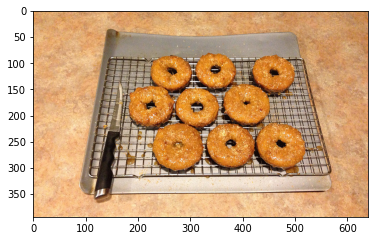

In [6]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
img = load_img('images/8734543718_37f6b8bd45_z.jpg')
pyplot.imshow(img)
img = img_to_array(img)

In [7]:
# make prediction
results = model.detect([img], verbose=0)

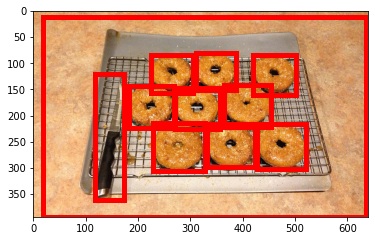

In [8]:
# visualize the results
draw_image_with_boxes('images/8734543718_37f6b8bd45_z.jpg', results[0]['rois'])

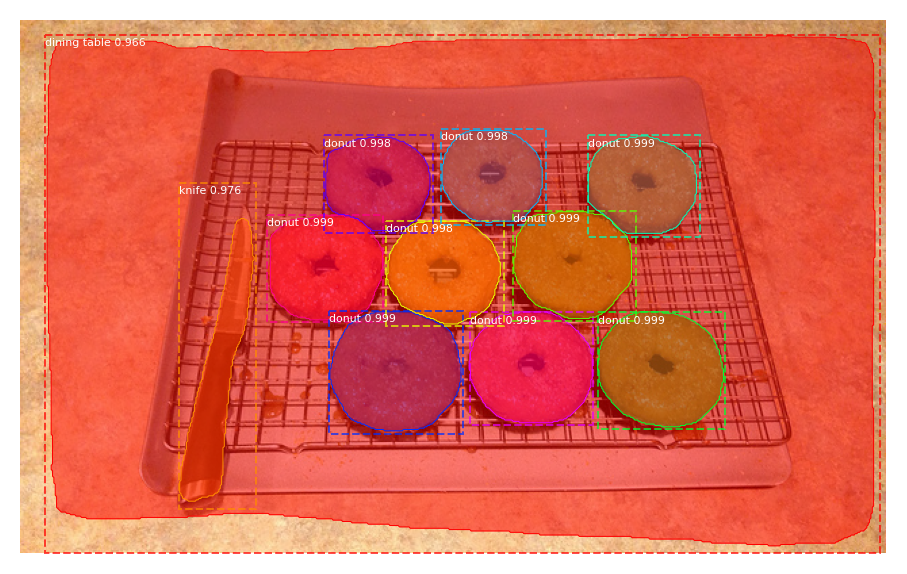

In [9]:
# get dictionary for first prediction
from mrcnn.visualize import display_instances
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(img, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [10]:
classes= r['class_ids']
print("Total Objects found", len(classes))
for i in range(len(classes)):
    print(class_names[classes[i]])

Total Objects found 11
donut
donut
donut
donut
donut
donut
donut
donut
donut
knife
dining table


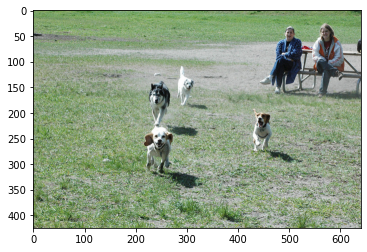

In [11]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
imgDog = load_img('images/2516944023_d00345997d_z.jpg')
pyplot.imshow(imgDog)
imgDog = img_to_array(imgDog)

In [12]:
# make prediction
results = model.detect([imgDog], verbose=0)

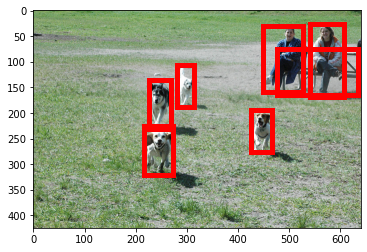

In [13]:
# visualize the results
draw_image_with_boxes('images/2516944023_d00345997d_z.jpg', results[0]['rois'])

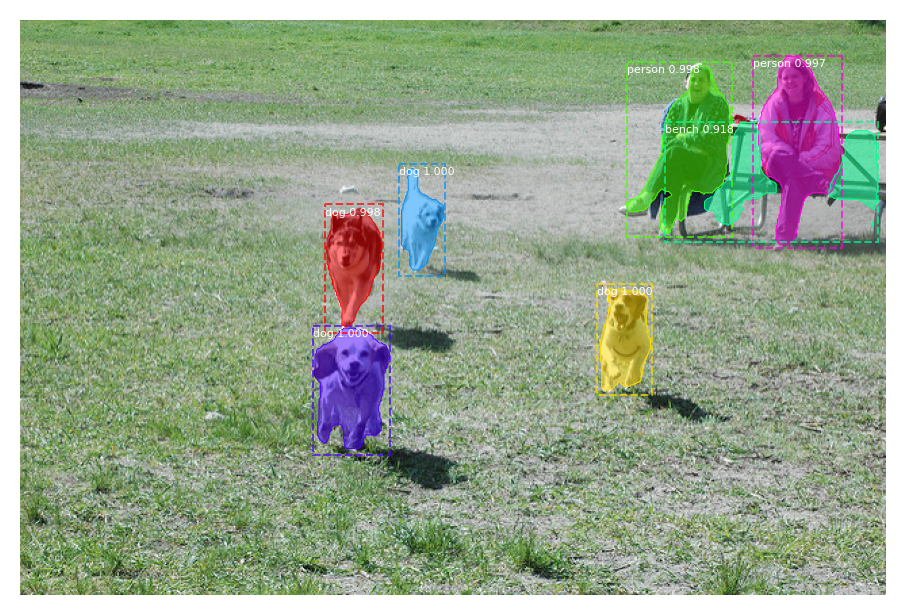

In [14]:
# get dictionary for first prediction
from mrcnn.visualize import display_instances
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(imgDog, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

In [15]:
classes= r['class_ids']
print("Total Objects found", len(classes))
for i in range(len(classes)):
    print(class_names[classes[i]])

Total Objects found 7
dog
dog
dog
person
dog
person
bench


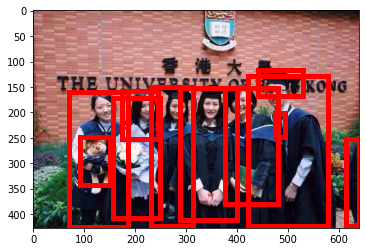

In [16]:
imgGrad = load_img('images/graduation.jpeg')
pyplot.imshow(imgGrad)
imgGrad = img_to_array(imgGrad)
# make prediction
results = model.detect([imgGrad], verbose=0)
# visualize the results
draw_image_with_boxes('images/graduation.jpeg', results[0]['rois'])

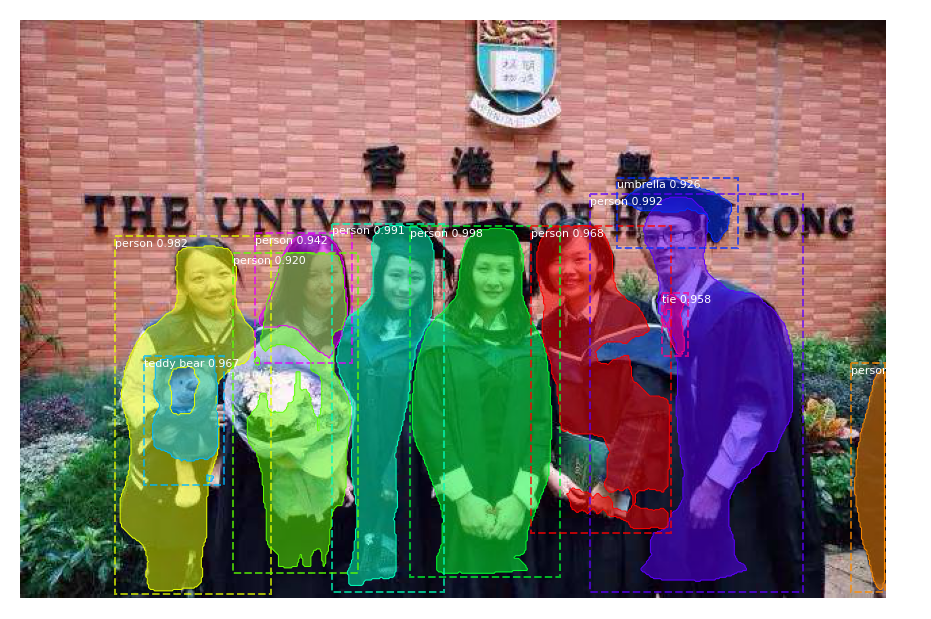

Total Objects found 11
person
person
person
person
person
teddy bear
tie
person
umbrella
person
person


In [17]:
# get dictionary for first prediction
r = results[0]
# show photo with bounding boxes, masks, class labels and scores
display_instances(imgGrad, r['rois'], r['masks'], r['class_ids'], class_names, r['scores'])

classes= r['class_ids']
print("Total Objects found", len(classes))
for i in range(len(classes)):
    print(class_names[classes[i]])